In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import copy

In [46]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

In [266]:
obj_l = ['obj_'+str(x) for x in range(10)]
obj_l

['obj_0',
 'obj_1',
 'obj_2',
 'obj_3',
 'obj_4',
 'obj_5',
 'obj_6',
 'obj_7',
 'obj_8',
 'obj_9']

# Training Curves

In [67]:
dir_path = 'IROS/training_curves/'
df_l = []
for o in obj_l:
    aux_df = pd.read_csv(dir_path + o + '.csv')
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l)

In [68]:
d = {}
for o in obj_l:
    aux_df = pd.DataFrame()
    aux_df['Value'] = df[df['object'] == o]['Value'].ewm(span=20).mean()
    aux_df['object'] = o
    aux_df['Step'] = df[df['object'] == o]['Step']
    d[o] = aux_df
df = pd.concat([d[k] for k in d.keys()])

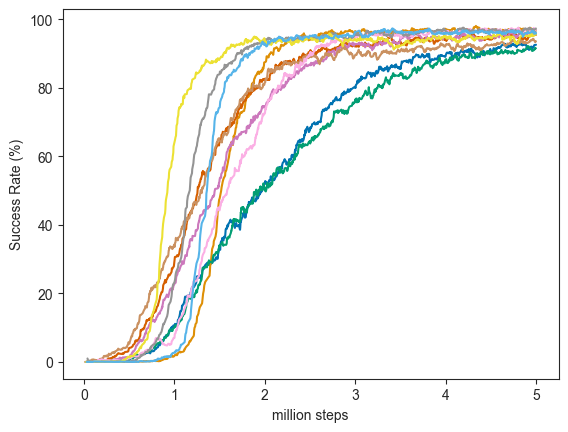

In [69]:
aux_df = copy.deepcopy(df)
aux_df['Object'] = aux_df['object']
aux_df['million steps'] = aux_df['Step']/ 1e6
aux_df['Success Rate (%)'] = 100*aux_df['Value']
sns.set_style("ticks")
sns.lineplot(aux_df, x='million steps', y='Success Rate (%)', hue='Object', legend=None, palette=sns.color_palette("colorblind"))
plt.savefig('IROS/images/training_curves.png',bbox_inches='tight')

# Evaluation

In [257]:
# obj_l = ['obj_0', 'obj_1', 'obj_2', 'obj_3', 'obj_4', 'obj_5']

In [267]:
dir_path = 'IROS/eval_results_8_15/'

df_l = []
for o in obj_l:
    aux_df = pd.read_csv(dir_path + o + '.csv')
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l)

grouped_df = df.groupby(['object','capsule_width']).apply(lambda x: x.mean())
df_l = []
for o in obj_l:
    aux_df = grouped_df.loc[o].reset_index()
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l).reset_index(drop=True)
df['capsular'] = True

final_df = copy.deepcopy(df)

In [268]:
dir_path = 'IROS/eval_results_16_25/'

df_l = []
for o in obj_l:
    aux_df = pd.read_csv(dir_path + o + '.csv')
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l)

grouped_df = df.groupby(['object','capsule_width']).apply(lambda x: x.mean())
df_l = []
for o in obj_l:
    aux_df = grouped_df.loc[o].reset_index()
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l).reset_index(drop=True)
df['capsular'] = True

final_df = pd.concat([final_df, df])

In [269]:
dir_path = 'IROS/eval_results_no_capsule_8_25/'

df_l = []
for o in obj_l:
    aux_df = pd.read_csv(dir_path + o + '.csv')
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l)

grouped_df = df.groupby(['object','capsule_width']).apply(lambda x: x.mean())
df_l = []
for o in obj_l:
    aux_df = grouped_df.loc[o].reset_index()
    aux_df['object'] = o
    df_l.append(aux_df)
df = pd.concat(df_l).reset_index(drop=True)
df['capsular'] = False

final_df = pd.concat([final_df, df])

In [270]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

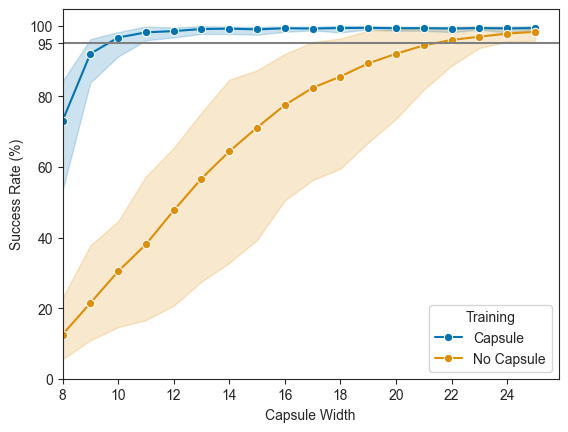

In [274]:
aux_df = copy.deepcopy(final_df)
aux_df['Object'] = aux_df['object']
aux_df['Success Rate (%)'] = 100*aux_df['success']
aux_df['Capsule Width'] = aux_df['capsule_width']
aux_df['Training'] = aux_df['capsular'].apply(lambda x: 'Capsule' if x else 'No Capsule')
sns.set_style("ticks")
ax = sns.lineplot(
    aux_df, x='Capsule Width', y='Success Rate (%)', hue='Training', 
    errorbar=("pi", 100), 
    marker='o', palette=sns.color_palette("colorblind")[0:2]
)
ax.axhline(95, color=(0.5, 0.5, 0.5))
# ax.set_yticks(np.append(ax.get_yticks(), 95))
ax.set_yticks(np.array([  0.,  20.,  40.,  60.,  80., 100., 95.]))
ax.set_xlim(8, )
print()
plt.savefig('IROS/images/width_x_success.png',bbox_inches='tight')

<Axes: xlabel='Capsule Width', ylabel='Success Rate (%)'>

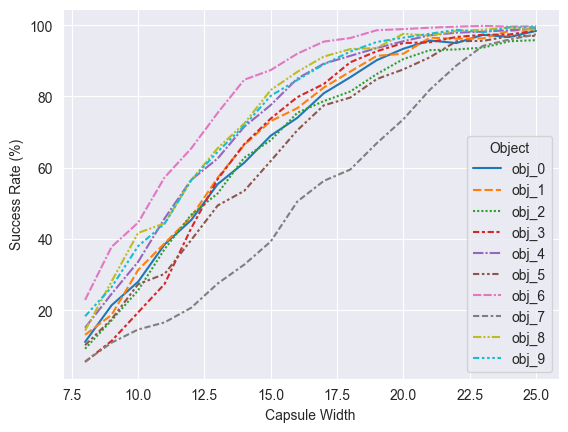

In [277]:
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['Success Rate (%)'] = 100*aux_df['success']
aux_df['Capsule Width'] = aux_df['capsule_width']
sns.set_style("darkgrid")
sns.lineplot(aux_df, x='Capsule Width', y='Success Rate (%)', hue='Object', style='Object')

<Axes: xlabel='Capsule Width', ylabel='Success Rate (%)'>

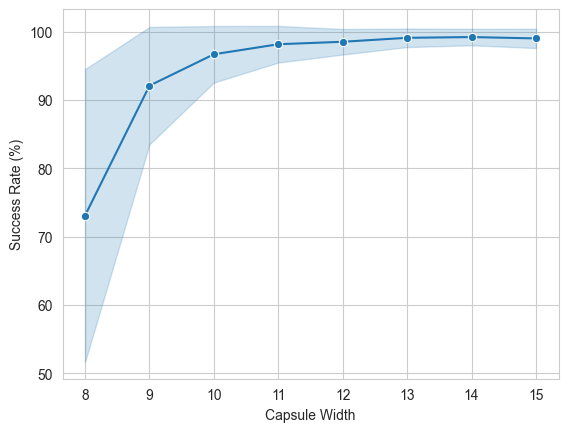

In [182]:
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['Success Rate (%)'] = 100*aux_df['success']
aux_df['Capsule Width'] = aux_df['capsule_width']
sns.set_style("whitegrid")
sns.lineplot(aux_df, x='Capsule Width', y='Success Rate (%)', errorbar=("sd", 1.96), marker='o')

<Axes: xlabel='Capsule Width', ylabel='Success Rate (%)'>

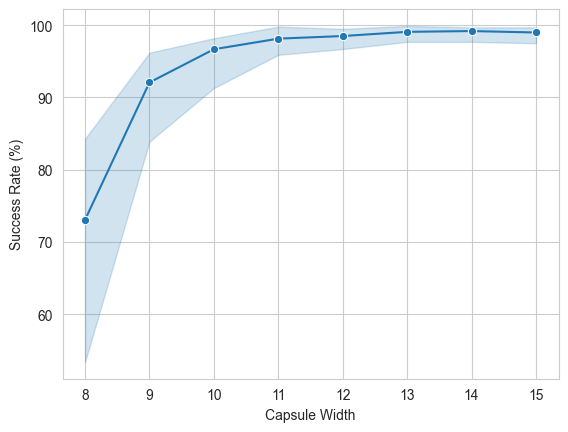

In [183]:
aux_df = df
aux_df['Object'] = aux_df['object']
aux_df['Success Rate (%)'] = 100*aux_df['success']
aux_df['Capsule Width'] = aux_df['capsule_width']
sns.set_style("whitegrid")
sns.lineplot(aux_df, x='Capsule Width', y='Success Rate (%)', errorbar=("pi", 100), marker='o')

In [272]:
agg_df = pd.DataFrame()
agg_df['tuple'] = final_df[final_df['capsular']].groupby('capsule_width').apply(lambda x: mean_confidence_interval(x['success']))

agg_df['mean'] = agg_df['tuple'].apply(lambda x: 100*x[0])
agg_df['confidence'] = agg_df['tuple'].apply(lambda x: 100*x[1])
agg_df[['mean', 'confidence']]

,mean,confidence
capsule_width,,
8.0,73.07,7.819640
9.0,92.08,3.133956
10.0,96.67,1.508124
11.0,98.14,0.978061
12.0,98.50,0.681990
13.0,99.08,0.494235
14.0,99.19,0.438972
15.0,98.99,0.514140
16.0,99.30,0.307224


In [273]:
agg_df = pd.DataFrame()
agg_df['tuple'] = final_df[~final_df['capsular']].groupby('capsule_width').apply(lambda x: mean_confidence_interval(x['success']))

agg_df['mean'] = agg_df['tuple'].apply(lambda x: 100*x[0])
agg_df['confidence'] = agg_df['tuple'].apply(lambda x: 100*x[1])
agg_df[['mean', 'confidence']]

,mean,confidence
capsule_width,,
8.0,12.53,3.895620
9.0,21.41,5.843244
10.0,30.41,6.774685
11.0,38.05,8.074507
12.0,47.67,8.830082
13.0,56.71,9.067050
14.0,64.39,9.886513
15.0,71.18,9.622122
16.0,77.54,8.280319


In [159]:
agg_df = pd.DataFrame()
agg_df['tuple'] = df.groupby('capsule_width').apply(lambda x: mean_confidence_interval(x['success']))

agg_df['mean'] = agg_df['tuple'].apply(lambda x: 100*x[0])
agg_df['confidence'] = agg_df['tuple'].apply(lambda x: 100*x[1])
agg_df[['mean', 'confidence']]

,mean,confidence
capsule_width,,
8.0,12.33,3.929771
9.0,20.53,4.844873
10.0,28.77,6.741081
11.0,38.13,7.963239
12.0,47.03,8.275844
13.0,56.89,9.772499
14.0,64.55,10.218189
15.0,71.40,9.379211


In [73]:
agg_df = pd.DataFrame()
agg_df['tuple'] = df.groupby('capsule_width').apply(lambda x: mean_confidence_interval(x['success']))

agg_df['mean'] = agg_df['tuple'].apply(lambda x: 100*x[0])
agg_df['confidence'] = agg_df['tuple'].apply(lambda x: 100*x[1])
agg_df[['mean', 'confidence']]

,mean,confidence
capsule_width,,
8.0,73.07,7.819640
9.0,92.08,3.133956
10.0,96.67,1.508124
11.0,98.14,0.978061
12.0,98.50,0.681990
13.0,99.08,0.494235
14.0,99.19,0.438972
15.0,98.99,0.514140


# Mapless Transportation

In [120]:
df = pd.read_csv('IROS/results_mapless.csv')

In [121]:
def is_valid_aux(row):
    if row['map'][-2:] == '30' and row['corridor_width'] == 12.0 and row['corridor_width_for_robot'] == 12.0:
        return True
    elif row['map'][-2:] == '25' and row['corridor_width'] == 11.5 and row['corridor_width_for_robot'] == 11.5:
        return True
    elif row['map'][-2:] == '20' and row['corridor_width'] == 8.5 and row['corridor_width_for_robot'] == 10.0:
        return True
    return False

In [122]:
df = df[df.apply(is_valid_aux, axis=1)]
map_l = list(df['map'].unique())

grouped_df = df.groupby(['map', 'obj_id']).apply(lambda x: x['success'].mean())

map_d = {}
for map_i in map_l:
    map_d[map_i] = list(grouped_df.loc[map_i])

In [123]:
for map_i in map_d.keys():
    print(map_i)
    m, h = mean_confidence_interval(map_d[map_i])
    print("{:0.2f} +- {:0.2f}".format(100*m, 100*h))

square_middle_corr_30
99.15 +- 0.63
four_squares_corr_30
98.75 +- 1.13
parallel_walls_corr_30
98.35 +- 1.30
mapless_1_corr_30
98.25 +- 1.08
mapless_2_corr_30
97.90 +- 1.31
square_middle_corr_25
98.15 +- 1.40
four_squares_corr_25
97.25 +- 2.16
parallel_walls_corr_25
96.65 +- 2.93
mapless_1_corr_25
97.20 +- 1.41
mapless_2_corr_25
96.00 +- 2.71
square_middle_corr_20
86.85 +- 5.94
four_squares_corr_20
87.60 +- 5.04
parallel_walls_corr_20
82.55 +- 6.54
mapless_1_corr_20
91.60 +- 3.88
mapless_2_corr_20
79.80 +- 7.02


In [124]:
s = '20 m'
for map_i in ['square_middle_corr_20', 'four_squares_corr_20', 'parallel_walls_corr_20', 'mapless_1_corr_20', 'mapless_2_corr_20']:
    m, h = mean_confidence_interval(map_d[map_i])
    s += ' & ${:0.1f} \\pm {:0.1f}$'.format(100*m, 100*h)
s += '\\\\ \\hline'
print(s)

s = '25 m'
for map_i in ['square_middle_corr_25', 'four_squares_corr_25', 'parallel_walls_corr_25', 'mapless_1_corr_25', 'mapless_2_corr_25']:
    m, h = mean_confidence_interval(map_d[map_i])
    s += ' & ${:0.1f} \\pm {:0.1f}$'.format(100*m, 100*h)
s += '\\\\ \\hline'
print(s)

s = '30 m'
for map_i in ['square_middle_corr_30', 'four_squares_corr_30', 'parallel_walls_corr_30', 'mapless_1_corr_30', 'mapless_2_corr_30']:
    m, h = mean_confidence_interval(map_d[map_i])
    s += ' & ${:0.1f} \\pm {:0.1f}$'.format(100*m, 100*h)
s += '\\\\ \\hline'
print(s)

20 m & $86.9 \pm 5.9$ & $87.6 \pm 5.0$ & $82.5 \pm 6.5$ & $91.6 \pm 3.9$ & $79.8 \pm 7.0$\\ \hline
25 m & $98.1 \pm 1.4$ & $97.2 \pm 2.2$ & $96.6 \pm 2.9$ & $97.2 \pm 1.4$ & $96.0 \pm 2.7$\\ \hline
30 m & $99.1 \pm 0.6$ & $98.7 \pm 1.1$ & $98.4 \pm 1.3$ & $98.2 \pm 1.1$ & $97.9 \pm 1.3$\\ \hline


In [ ]:
20 m & $86.9 \pm 5.9$ & $87.6 \pm 5.0$ & $82.5 \pm 6.5$ & $91.6 \pm 3.9$ & $79.8 \pm 7.0$\\ \hline
25 m & $98.1 \pm 1.4$ & $97.2 \pm 2.2$ & $96.6 \pm 2.9$ & $97.2 \pm 1.4$ & $96.0 \pm 2.7$\\ \hline
30 m & $99.1 \pm 0.6$ & $98.7 \pm 1.1$ & $98.4 \pm 1.3$ & $98.2 \pm 1.1$ & $97.9 \pm 1.3$\\ \hline